In [19]:
# Import necesary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt

In [20]:
# Load the dataset
df = pd.read_csv('BACK_DEF.csv')

In [21]:
# Split the dataset into features (X) and the target variable (y)
X = df.drop('Percentil_Rango', axis=1)
y = df['Percentil_Rango']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [35]:
# Define prediction labels

etiquetas = y.unique().tolist()
ordered_labels = sorted(etiquetas)

In [23]:
# Scale features for some algorithms (optional, depending on the model)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Initialize models
models = {
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
    # Add more models if needed
}

In [33]:
# Train and evaluate the models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name}: Accuracy = {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)

Gradient Boosting: Accuracy = 0.9305
Support Vector Machine: Accuracy = 0.3068


c:\Users\alexm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors: Accuracy = 0.2565
Logistic Regression: Accuracy = 0.1643
Random Forest: Accuracy = 0.9311


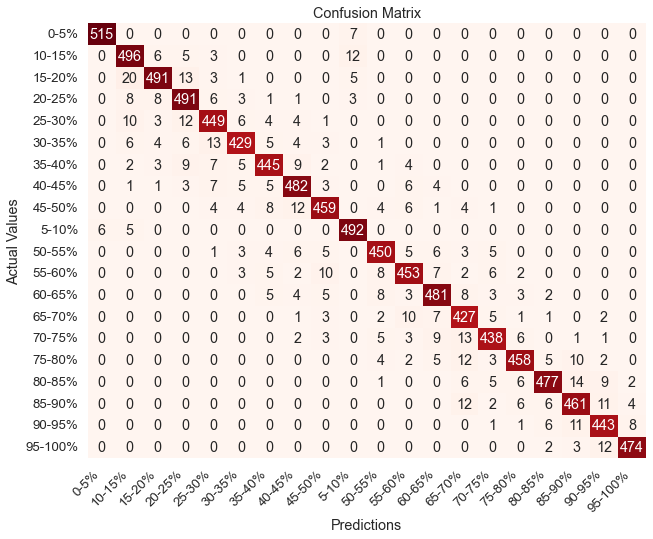

In [36]:
# Set up the visualization style
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)

# Create a heatmap with red tones and custom labels
heatmap = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Reds', cbar=False, xticklabels=ordered_labels, yticklabels=ordered_labels)

# Adjust labels for proper visibility
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.title("Confusion Matrix")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.show()

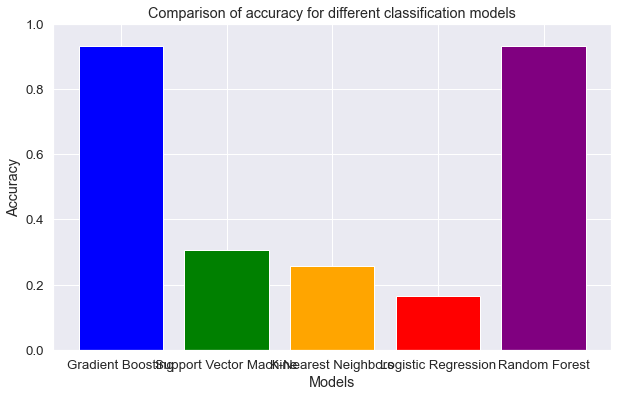

In [37]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of accuracy for different classification models')
plt.ylim(0, 1)  # Adjust the y-axis range if necessary
plt.show()

In [38]:
# Define lists of possible values for hyperparameters
n_estimators_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300]
criterion_values = ['gini', 'entropy']
max_depth_values = [None, 5, 10, 15, 20, 40, 80]
min_samples_split_values = [0.5, 2, 5, 10, 20]
min_samples_leaf_values = [1, 2, 4, 8]
max_features_values = ['auto', 'sqrt', 'log2']

# Initialize lists to store accuracy for each value of each hyperparameter
accuracy_n_estimators = []
accuracy_criterion = []
accuracy_max_depth = []
accuracy_min_samples_split = []
accuracy_min_samples_leaf = []
accuracy_max_features = []

# Test different values for 'n_estimators'
for n_estimators_value in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n_estimators_value, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy_n_estimators.append(accuracy_score(y_test, y_pred))

# Test different values for 'criterion'
for criterion_value in criterion_values:
    rf = RandomForestClassifier(criterion=criterion_value, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy_criterion.append(accuracy_score(y_test, y_pred))

# Test different values for 'max_depth'
for max_depth_value in max_depth_values:
    rf = RandomForestClassifier(max_depth=max_depth_value, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy_max_depth.append(accuracy_score(y_test, y_pred))

# Test different values for 'min_samples_split'
for min_samples_split_value in min_samples_split_values:
    rf = RandomForestClassifier(min_samples_split=min_samples_split_value, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy_min_samples_split.append(accuracy_score(y_test, y_pred))

# Test different values for 'min_samples_leaf'
for min_samples_leaf_value in min_samples_leaf_values:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf_value, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy_min_samples_leaf.append(accuracy_score(y_test, y_pred))

# Test different values for 'max_features'
for max_features_value in max_features_values:
    rf = RandomForestClassifier(max_features=max_features_value, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy_max_features.append(accuracy_score(y_test, y_pred))

# Plot the evolution of accuracy for each value of each hyperparameter
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(n_estimators_values, accuracy_n_estimators, marker='o')
plt.title('Accuracy variation with respect to n_estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')

plt.subplot(2, 3, 2)
plt.bar(criterion_values, accuracy_criterion, color=['blue', 'green'])
plt.title('Accuracy variation with respect to criterion')
plt.xlabel('Criterion (criterion)')
plt.ylabel('Accuracy')

plt.subplot(2, 3, 3)
plt.plot(max_depth_values, accuracy_max_depth, marker='o')
plt.title('Accuracy variation with respect to max_depth')
plt.xlabel('Maximum Depth (max_depth)')
plt.ylabel('Accuracy')

plt.subplot(2, 3, 4)
plt.plot(min_samples_split_values, accuracy_min_samples_split, marker='o')
plt.title('Accuracy variation with respect to min_samples_split')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')

plt.subplot(2, 3, 5)
plt.plot(min_samples_leaf_values, accuracy_min_samples_leaf, marker='o')
plt.title('Accuracy variation with respect to min_samples_leaf')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')

plt.subplot(2, 3, 6)
plt.bar(max_features_values, accuracy_max_features, color=['blue', 'green', 'red', 'purple'])
plt.title('Accuracy variation with respect to max_features')
plt.xlabel('Maximum Number of Features (max_features)')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()
